# Exploratory Analysis with Linear Regressions

## Covid Cases in Washington State by Month/Year

Author: Daniel Dills


## Notebook Imports

In [471]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Import Data

In [472]:
df = pd.read_csv("us_states.csv")

## First five rows of data set

In [473]:
df.head(5)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


## Ensuring date column of Data Frame is converted into Date Time object

In [474]:
df["date"] = pd.to_datetime(df["date"])

In [475]:
wa_state = df[df["state"] == "Washington"]
print(wa_state)

            date       state  fips   cases  deaths
0     2020-01-21  Washington    53       1       0
1     2020-01-22  Washington    53       1       0
2     2020-01-23  Washington    53       1       0
4     2020-01-24  Washington    53       1       0
7     2020-01-25  Washington    53       1       0
...          ...         ...   ...     ...     ...
27345 2021-07-12  Washington    53  458724    6051
27400 2021-07-13  Washington    53  459282    6070
27455 2021-07-14  Washington    53  460015    6076
27510 2021-07-15  Washington    53  460730    6086
27565 2021-07-16  Washington    53  461401    6093

[543 rows x 5 columns]


## Arranging Data

In [476]:
X = wa_state["date"].values
y = wa_state["cases"].values

In [477]:
X = X.reshape(-1, 1)
print(X)

[['2020-01-21T00:00:00.000000000']
 ['2020-01-22T00:00:00.000000000']
 ['2020-01-23T00:00:00.000000000']
 ['2020-01-24T00:00:00.000000000']
 ['2020-01-25T00:00:00.000000000']
 ['2020-01-26T00:00:00.000000000']
 ['2020-01-27T00:00:00.000000000']
 ['2020-01-28T00:00:00.000000000']
 ['2020-01-29T00:00:00.000000000']
 ['2020-01-30T00:00:00.000000000']
 ['2020-01-31T00:00:00.000000000']
 ['2020-02-01T00:00:00.000000000']
 ['2020-02-02T00:00:00.000000000']
 ['2020-02-03T00:00:00.000000000']
 ['2020-02-04T00:00:00.000000000']
 ['2020-02-05T00:00:00.000000000']
 ['2020-02-06T00:00:00.000000000']
 ['2020-02-07T00:00:00.000000000']
 ['2020-02-08T00:00:00.000000000']
 ['2020-02-09T00:00:00.000000000']
 ['2020-02-10T00:00:00.000000000']
 ['2020-02-11T00:00:00.000000000']
 ['2020-02-12T00:00:00.000000000']
 ['2020-02-13T00:00:00.000000000']
 ['2020-02-14T00:00:00.000000000']
 ['2020-02-15T00:00:00.000000000']
 ['2020-02-16T00:00:00.000000000']
 ['2020-02-17T00:00:00.000000000']
 ['2020-02-18T00:00:

## Train and Test Data

In [478]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

## Validate Shape of test/train data

In [479]:
print(f'x-train shape [{x_train.shape}]')

x-train shape [(434, 1)]


In [480]:
print(f'y-train shape [{y_train.shape}]')

y-train shape [(434,)]


In [481]:
print(f'x-test shape [{x_test.shape}]')

x-test shape [(109, 1)]


In [482]:
print(f'y-train shape [{y_train.shape}]')

y-train shape [(434,)]


## Plotting Data to display

Text(0.5, 1.0, 'Covid Cases in Washington State by Month')

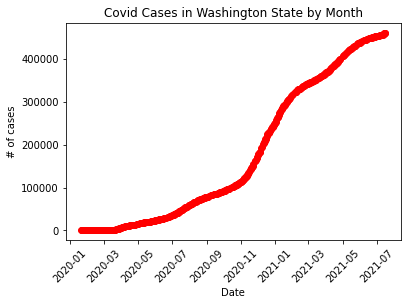

In [483]:
plt.xticks(rotation=45)
plt.scatter(x_train, y_train, color='red')
plt.xlabel("Date")
plt.ylabel("# of cases")
plt.title("Covid Cases in Washington State by Month")

In [484]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

In [ ]:
print(f'Training Accuracy {round(lm.score(x_train, y_train) * 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test) * 100,2)}%')

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

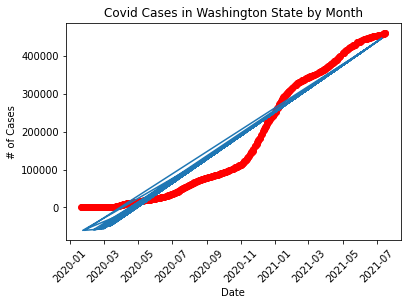

In [485]:
plt.xticks(rotation=45)
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Date')
plt.ylabel('# of Cases')
plt.title('Covid Cases in Washington State by Month')
plt.plot

## Conclusions

This assignment, I compared the Covid Cases in Washington State by month/year, from the start of the pandemic through July.

  1. The covid cases were a gradual curve upwards, then beginning in July 2020, Washington experienced a dramatic increase in cases.

  2. The first 100,000 covid cases took approximately eleven months with the second 100,000 coming in less than two.

  3. Washington began administering the covid vaccine in late December, early January, this began a leveling off of cases.
  